In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the dataset
df = pd.read_csv('../data/amazon_co-ecommerce_sample_cleaned_top_5.csv')

# Create a graph representation
G = nx.Graph()

for index, row in df.iterrows():
    G.add_node(row['product_name'])
    
    # Add edges based on "customers_who_bought_this_item_also_bought"
    also_bought = row['customers_who_bought_this_item_also_bought'].split(' > ')
    for item in also_bought:
        G.add_edge(row['product_name'], item)
        
    # Add edges based on "items_customers_buy_after_viewing_this_item"
    buy_after_viewing = row['items_customers_buy_after_viewing_this_item'].split(' > ')
    for item in buy_after_viewing:
        G.add_edge(row['product_name'], item)

# Compute PageRank
pagerank = nx.pagerank(G)
pagerank_sorted = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Identify communities using community detection
communities = list(nx.algorithms.community.label_propagation.asyn_lpa_communities(G))

# Create a dictionary to store product recommendations
recommendations = defaultdict(list)

# Recommend products based on PageRank and community detection
for i, (product, rank) in enumerate(pagerank_sorted):
    if i < 5:  # Recommend top 5 products based on PageRank
        recommendations[product].append(('PageRank', product))
        
    for community in communities:
        if product in community:
            for other_product in community:
                if other_product != product:
                    recommendations[product].append(('Community', other_product))
                    
# Print recommendations
for product, recommendations_list in recommendations.items():
    print(f"Recommendations for {product}:")
    for recommendation_type, recommended_product in recommendations_list:
        print(f"- {recommendation_type}: {recommended_product}")
    print()

Recommendations for Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model:
- PageRank: Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam Locomotive Model
- Community: Hornby-Railroad-Transatlanic 
- Community: Hornby-R6368-RailRoad-Gauge-Brake
- Community: Hornby-R076-00-Gauge-Footbridge 
- Community: Hornby-R3064-RailRoad-Smokey-Locomotive 
- Community: Hornby-R2672-RailRoad-Caledonian 
- Community: Hornby-R8222-Gauge-Track-Extension
- Community: Hornby-R6371-RailRoad-Petrol-Tanker
- Community: Hornby-R6367-RailRoad-Gauge-Rolling

Recommendations for Hornby 2014 Catalogue:
- PageRank: Hornby 2014 Catalogue
- Community: Peco-60-Plans-Book
- Community: Hornby-Gloucester 
- Community: Hornby-Book-Model-Railways-Edition
- Community: Hornby-Book-Scenic-Railway-Modelling
- Community: Hornby-R8150-Catalogue-2015
- Community: Newcomers-Guide-Model-Railways-Step
- Community: Airfix-5014429781902

Recommendations for FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017

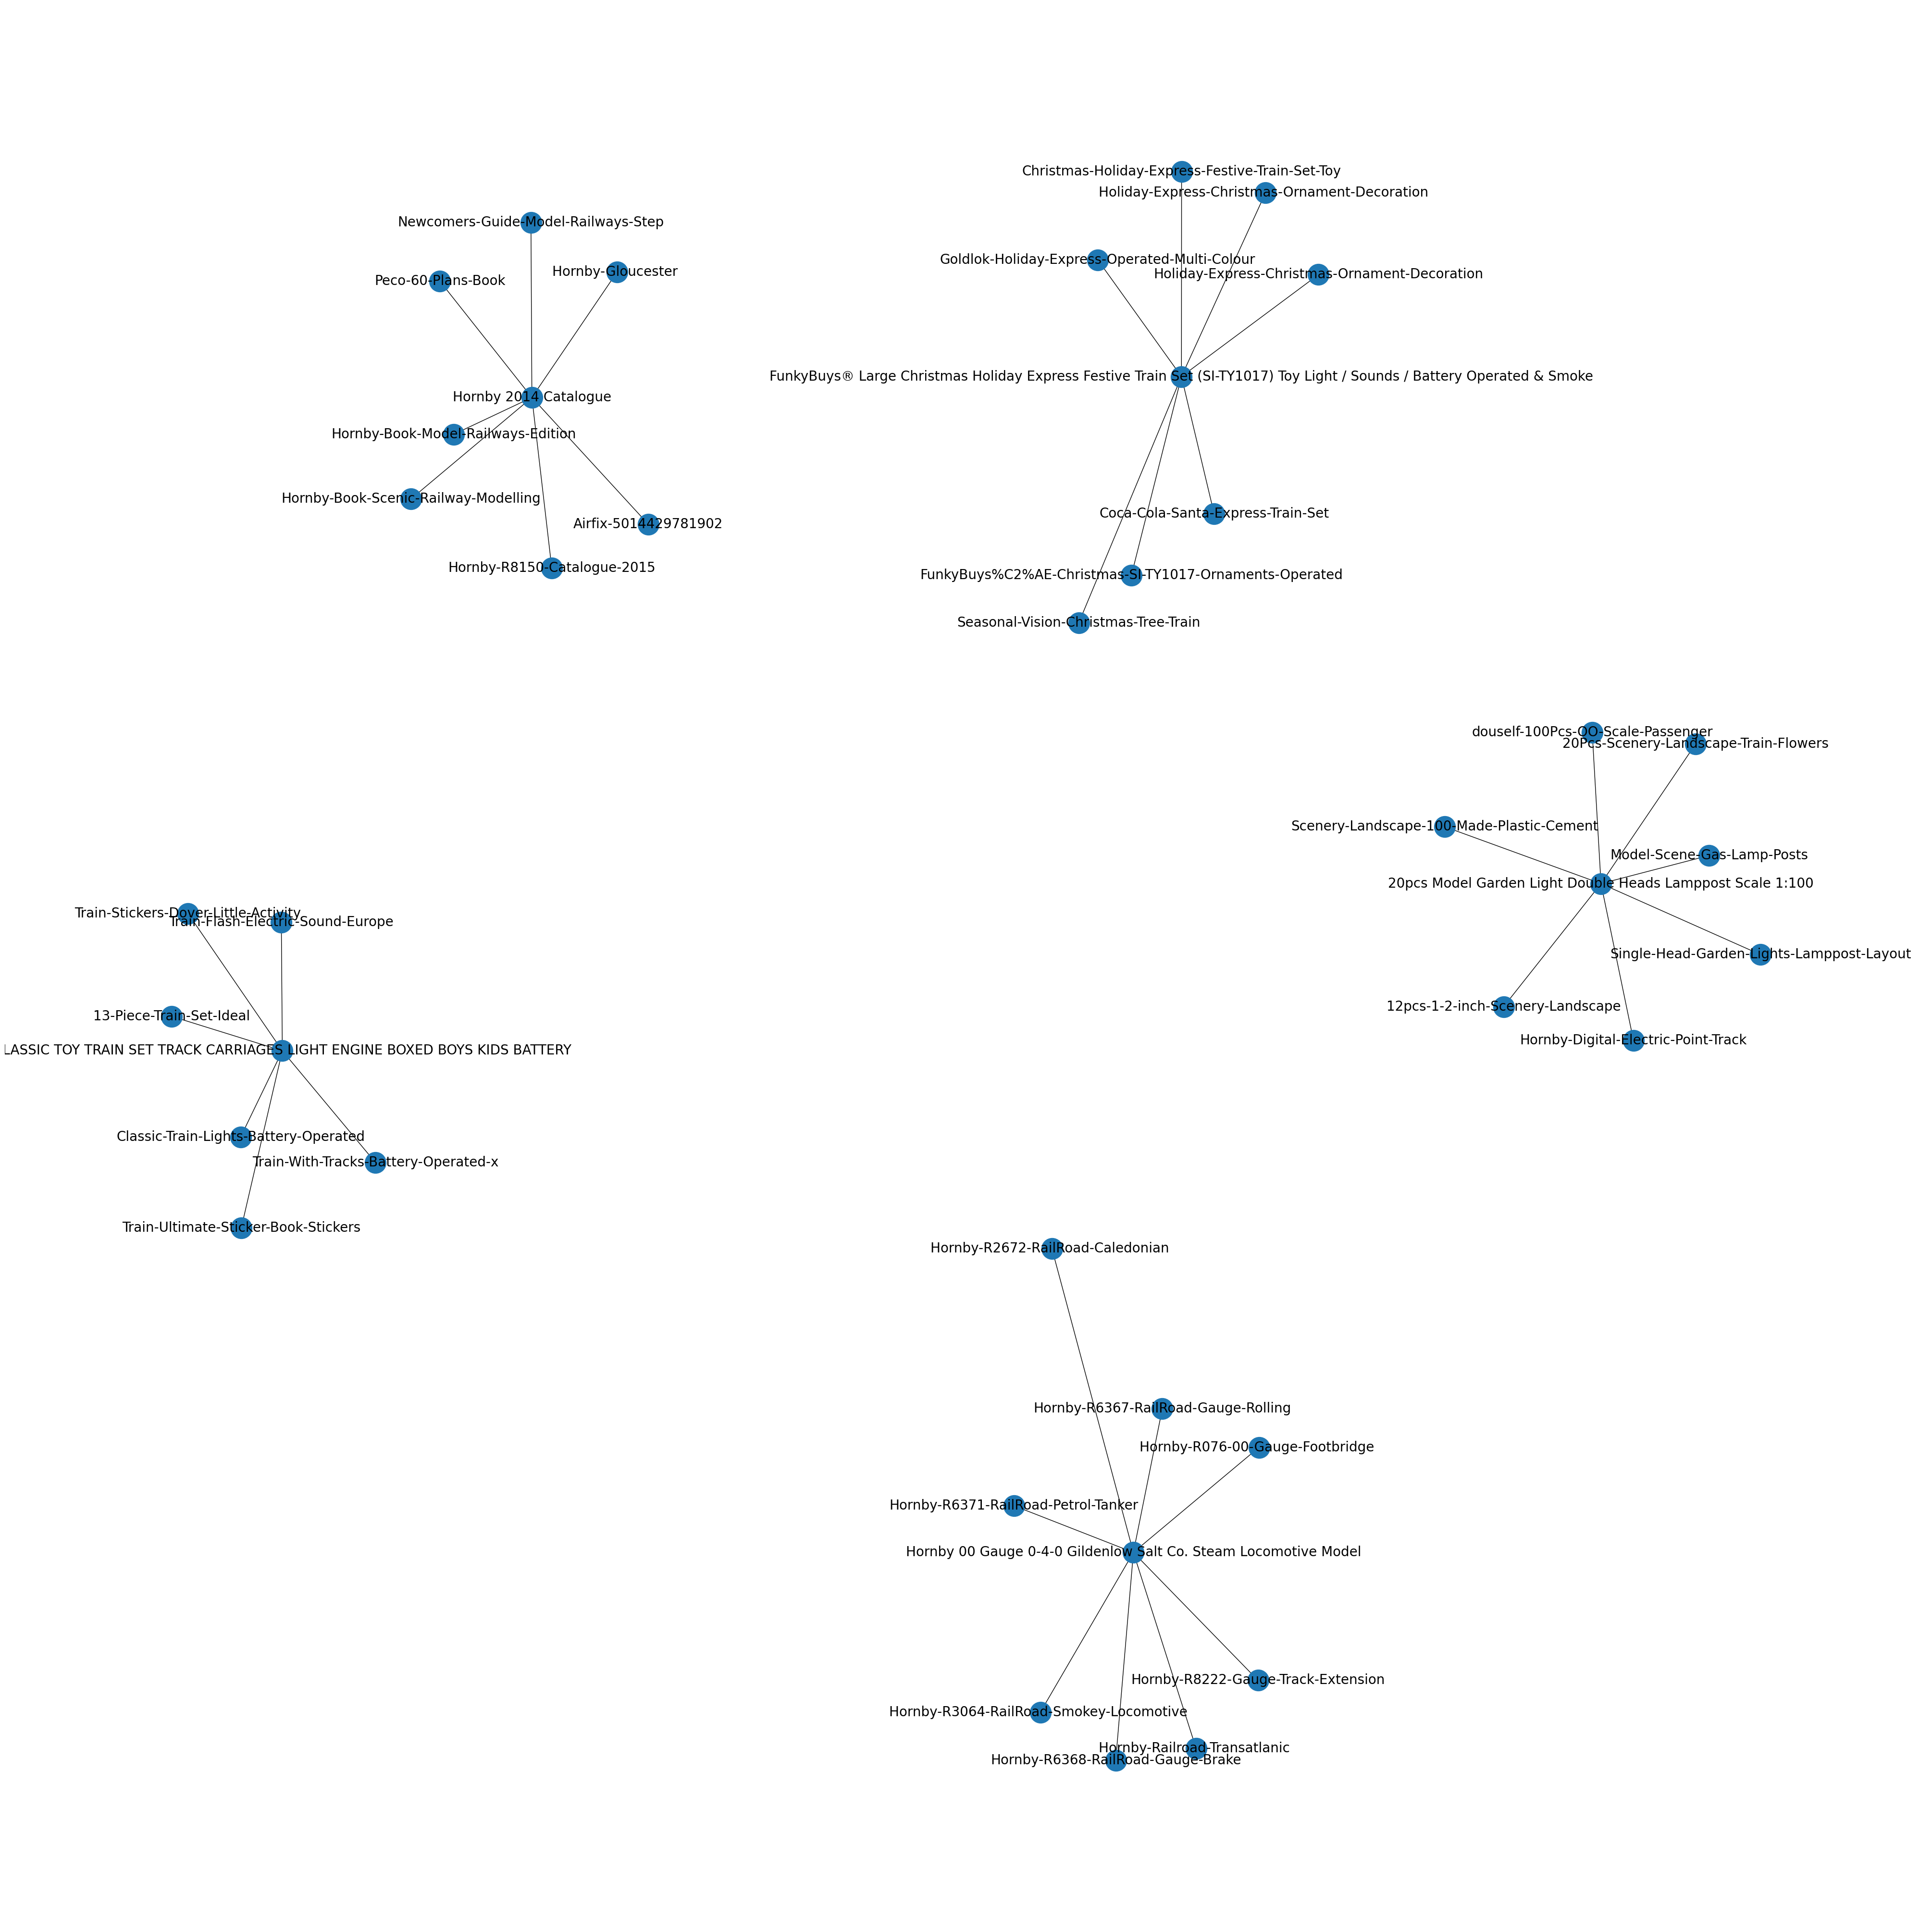

In [4]:
# visualize the graph with node labels
plt.figure(figsize=(40, 40))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, font_size=20, node_size=1000)
plt.show()

In [8]:

# # visualize the graph with communities
# plt.figure(figsize=(12, 12))
# colors = range(len(communities))
# pos = nx.spring_layout(G)
# nx.draw(G, pos, node_color=colors, node_size=10, width=0.5, cmap=plt.cm.tab20)
# plt.show()

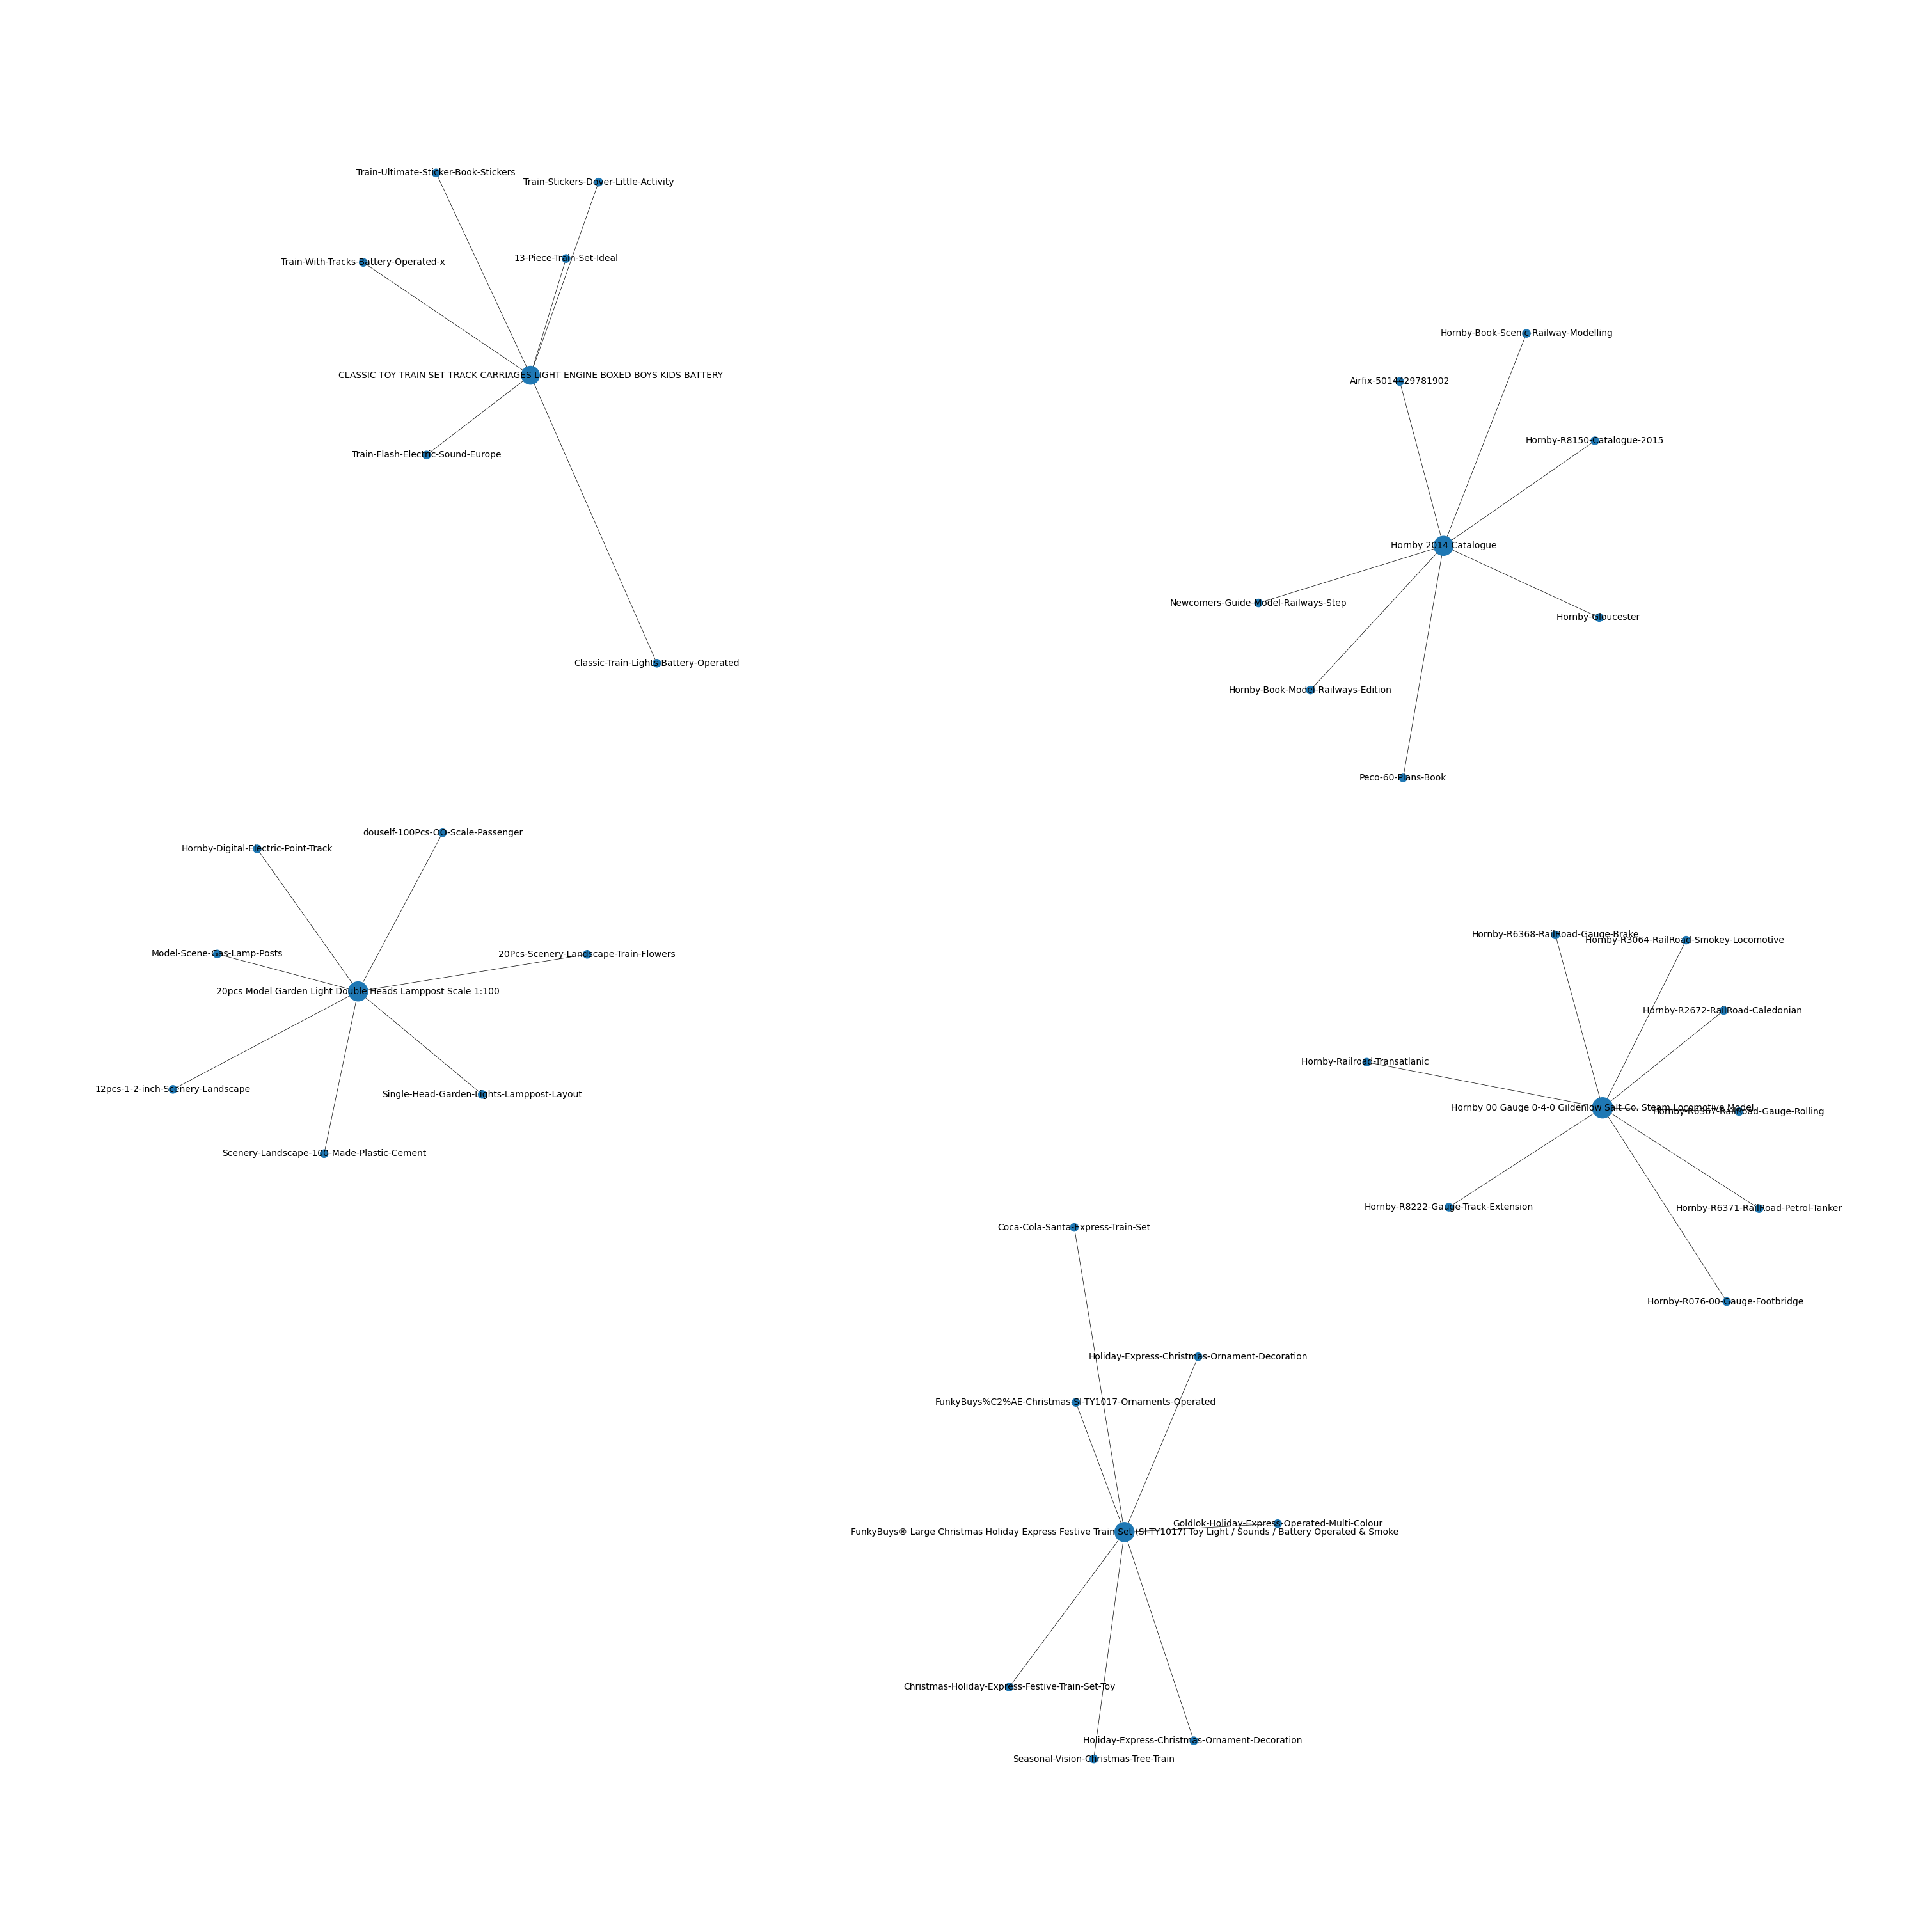

In [23]:

# visualize the graph with PageRank values
plt.figure(figsize=(30, 30))
node_size = [5000 * pagerank[node] for node in G]
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, node_size=node_size, width=0.5, cmap=plt.cm.viridis, with_labels=True, font_size=10)
plt.show()

In [20]:

# # visualize the graph with PageRank values and communities
# plt.figure(figsize=(12, 12))
# node_size = [5000 * pagerank[node] for node in G]
# colors = range(len(communities))
# pos = nx.spring_layout(G)
# nx.draw(G, pos, node_color=colors, node_size=node_size, width=0.5, cmap=plt.cm.tab20)
# plt.show()


In [6]:
# # Visualize the overall graph
# pos = nx.spring_layout(G)
# plt.figure(figsize=(12, 8))
# nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=8)
# plt.title('Overall Product Graph')
# plt.show()

In [9]:
# # Visualize the graph colored by PageRank
# pagerank = nx.pagerank(G)
# node_colors = [pagerank[node] for node in G.nodes()]
# plt.figure(figsize=(12, 8))
# sc = nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap='viridis', edge_color='gray', node_size=500, font_size=8)
# plt.title('Graph Colored by PageRank')
# plt.colorbar(sc)
# plt.show()

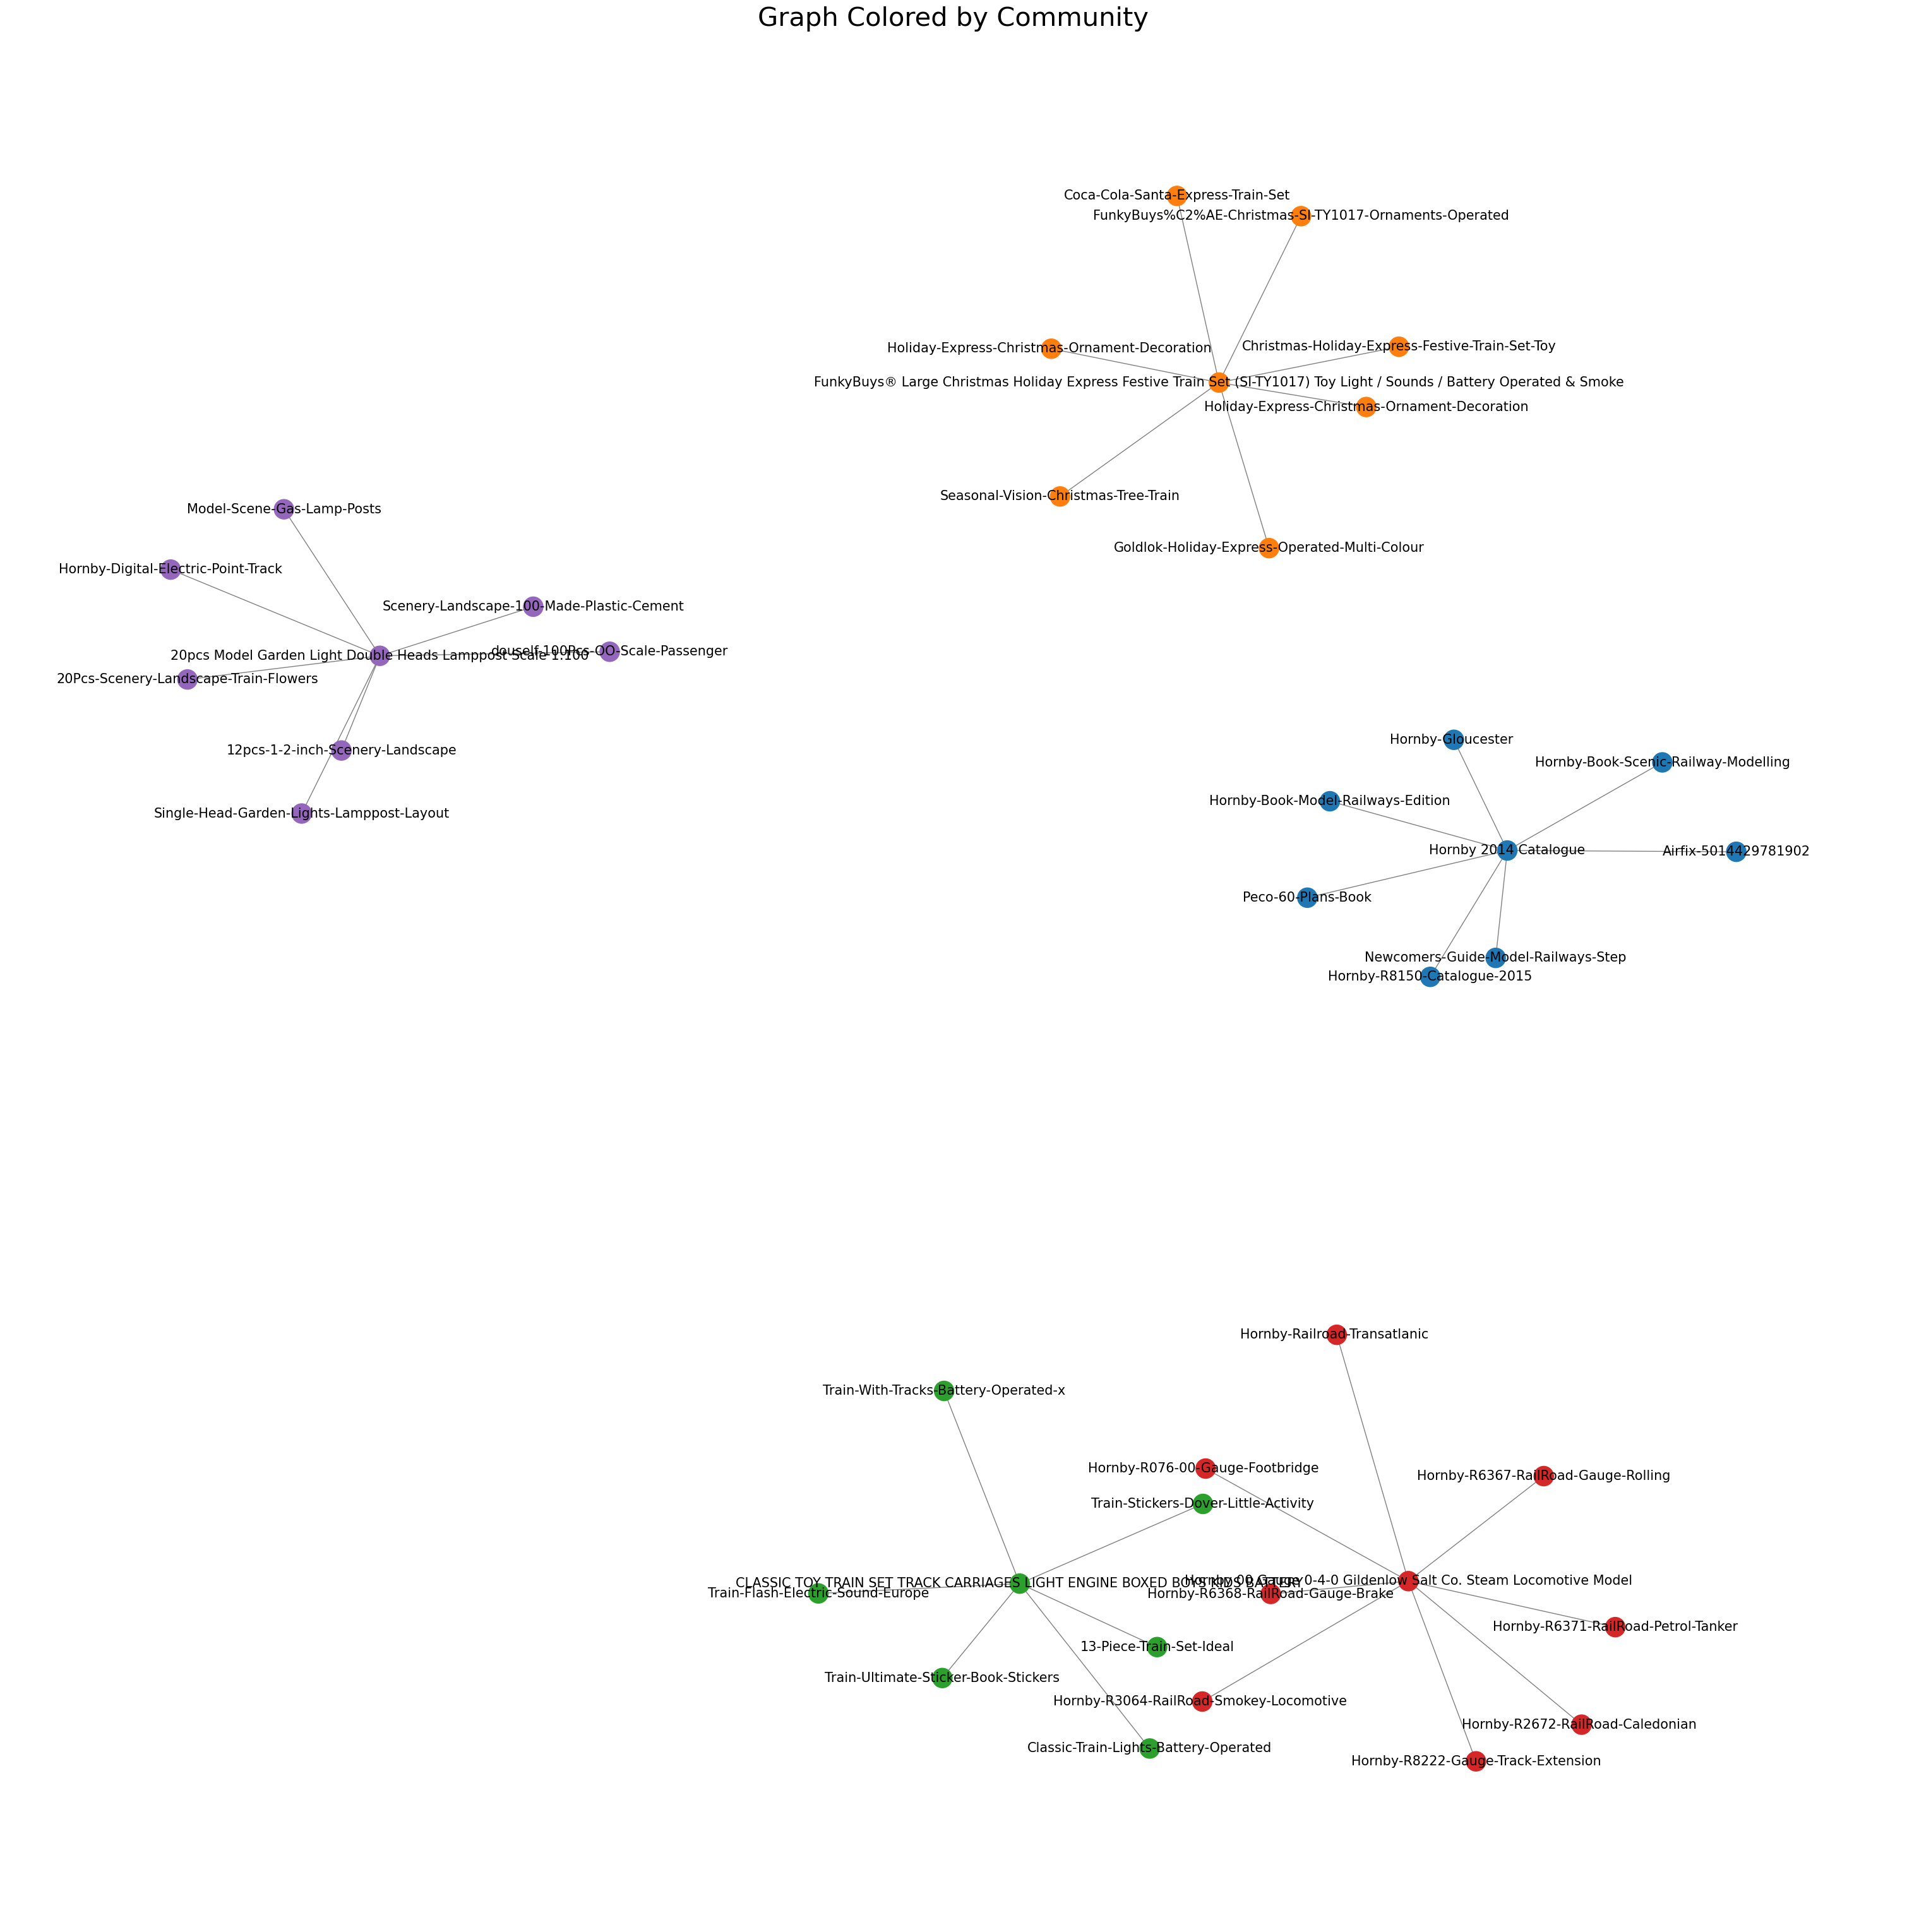

In [17]:

# Visualize the graph colored by community
node_colors = [f'C{i}' for i, community in enumerate(communities) for _ in community]
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, font_size=15)
plt.title('Graph Colored by Community', fontsize=30)
plt.show()